In [1]:
# You must install this system library to make pylibdmtx work
# sudo apt-get install libdmtx0b

In [15]:
from PIL import Image
import pylibdmtx.pylibdmtx
import albumentations
import numpy as np
import pandas as pd
import os

# First exploration

In [7]:
encoded = pylibdmtx.pylibdmtx.encode('Máme rádi papoušky'.encode('utf8'))
img = Image.frombytes('RGB', (encoded.width, encoded.height), encoded.pixels)
img.save('pictures/dmtx.png')
decoded = pylibdmtx.pylibdmtx.decode(Image.open('pictures/dmtx.png'))
decoded[0].data.decode("utf8")

'Máme rádi papoušky'

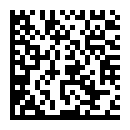

In [8]:
img

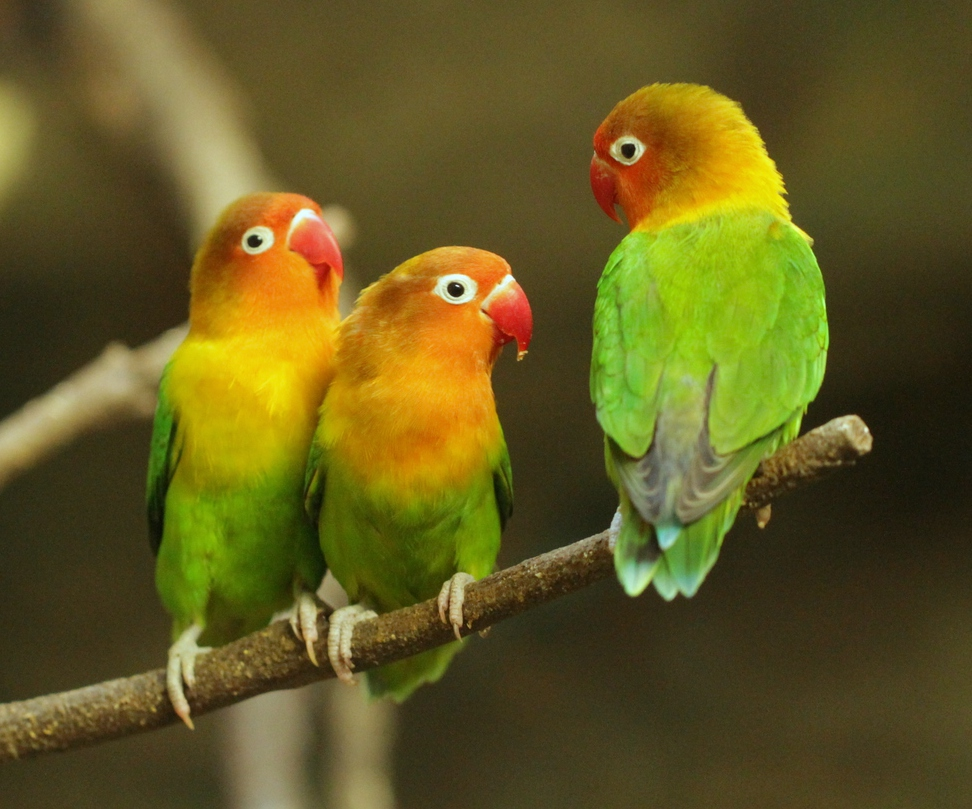

In [9]:
image = Image.open("pictures/parrot.jpg")
image

In [10]:
transform = albumentations.Compose([
    albumentations.RandomCrop(width=256, height=256),
    albumentations.HorizontalFlip(p=0.5),
    albumentations.RandomBrightnessContrast(p=0.2),
])

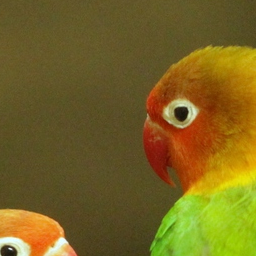

In [11]:
transformed = transform(image=np.array(image))
transformed_image = transformed["image"]
Image.fromarray(transformed_image)

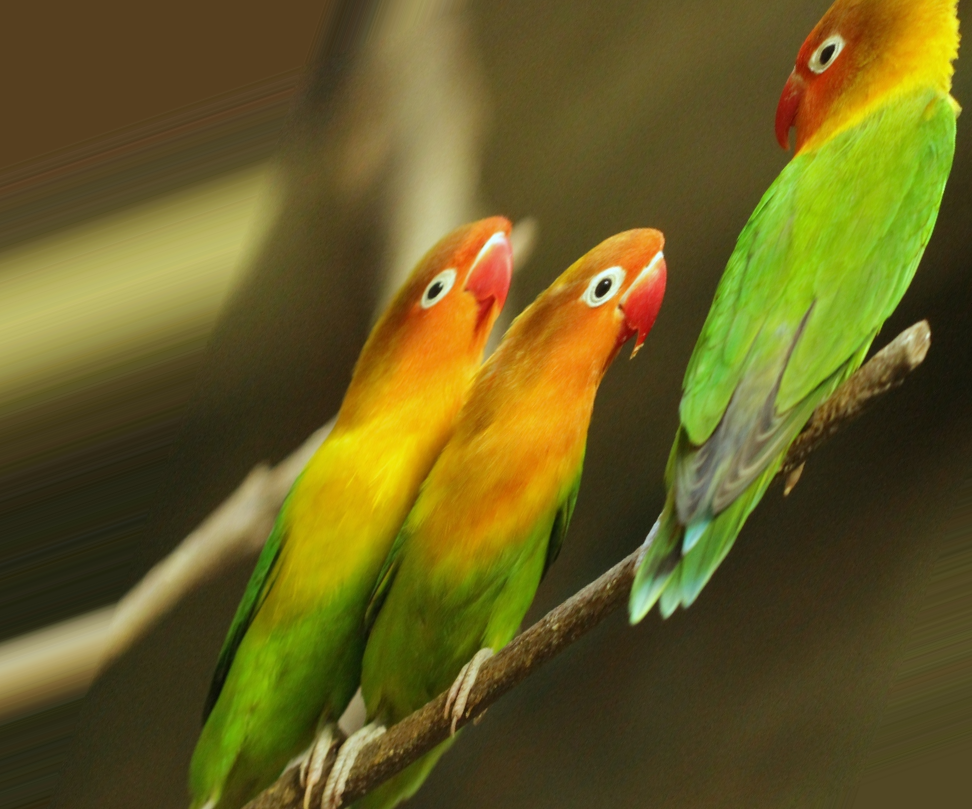

In [12]:
el_transform = albumentations.ElasticTransform(always_apply=True, alpha_affine=200, border_mode=1)
el_transformed = el_transform(image=np.array(image))
el_transformed_image = el_transformed["image"]
Image.fromarray(el_transformed_image)

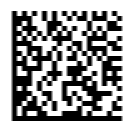

In [13]:
blur_transform = albumentations.MotionBlur(always_apply=True)
blur_transformed = blur_transform(image=np.array(img))
blur_transformed_image = blur_transformed["image"]
Image.fromarray(blur_transformed_image)

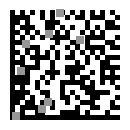

In [14]:
drop_transform = albumentations.CoarseDropout(always_apply=True, fill_value=150)
drop_transformed = drop_transform(image=np.array(img))
drop_transformed_image = drop_transformed["image"]
Image.fromarray(drop_transformed_image)

# Network

In [11]:
import conv_ae
import datamatrix_provider as dmp

/home/kp/miniconda3/envs/dm-codes/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


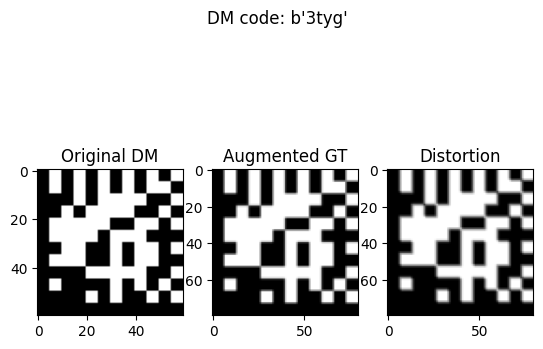

In [12]:
dm_provider_example = dmp.DataMatrixProvider(visualize=True)
dm_generate_example, dm_size_example, dm_mode_example, dm_mode_opts_example, dm_const_example = dm_provider_example.init_dm_provider(library="pylibdmtx", pylibdmtx_params={})
dm_clean_example, dm_augm_example, dm_text_example = dm_generate_example()